In [1]:
import cv2
import pandas as pd
from skimage import filters
from skimage.measure import regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
parent_dir = r"C:\Users\Asus\Desktop\PCD\Raw DATASET"
new_dir=r"C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset"
mode = 0o666

In [3]:
df = pd.read_excel(r"C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx")

In [4]:
full_mammo_path = df['image full mammo path']
mask_path = df['ROI mask file path']
a = list(df['patient_id'])
b = list(df['left or right breast'])
c = list(df['image view'])
e = list(df['abnormality id'])

In [5]:
azerty = [a[i]+"\\"+b[i]+"_"+c[i] for i in range(len(a))]
dic = dict()
for i in azerty :
    dic[i]=azerty.count(i)
print(dic)

{'P_00001\\LEFT_CC': 1, 'P_00001\\LEFT_MLO': 1, 'P_00004\\LEFT_CC': 1, 'P_00004\\LEFT_MLO': 1, 'P_00004\\RIGHT_MLO': 1, 'P_00009\\RIGHT_CC': 1, 'P_00009\\RIGHT_MLO': 1, 'P_00015\\LEFT_MLO': 1, 'P_00016\\LEFT_CC': 1, 'P_00016\\LEFT_MLO': 1, 'P_00017\\LEFT_CC': 1, 'P_00017\\LEFT_MLO': 1, 'P_00018\\RIGHT_CC': 1, 'P_00018\\RIGHT_MLO': 1, 'P_00021\\LEFT_CC': 1, 'P_00021\\LEFT_MLO': 1, 'P_00021\\RIGHT_CC': 1, 'P_00021\\RIGHT_MLO': 1, 'P_00023\\RIGHT_CC': 1, 'P_00023\\RIGHT_MLO': 1, 'P_00026\\LEFT_CC': 1, 'P_00026\\LEFT_MLO': 1, 'P_00027\\RIGHT_CC': 1, 'P_00027\\RIGHT_MLO': 1, 'P_00032\\RIGHT_CC': 1, 'P_00032\\RIGHT_MLO': 1, 'P_00034\\RIGHT_CC': 1, 'P_00034\\RIGHT_MLO': 1, 'P_00037\\RIGHT_CC': 1, 'P_00037\\RIGHT_MLO': 1, 'P_00039\\RIGHT_CC': 1, 'P_00039\\RIGHT_MLO': 1, 'P_00041\\LEFT_CC': 1, 'P_00041\\LEFT_MLO': 1, 'P_00044\\RIGHT_CC': 4, 'P_00044\\RIGHT_MLO': 2, 'P_00045\\LEFT_CC': 1, 'P_00045\\LEFT_MLO': 1, 'P_00046\\RIGHT_MLO': 1, 'P_00051\\LEFT_CC': 1, 'P_00051\\LEFT_MLO': 1, 'P_00054\\RI

# Creation fichier

In [6]:
E = set(df['patient_id'])

In [10]:
for i in E:
    directory = f"{i}"
    path = os.path.join(new_dir, directory)
    os.mkdir(path, mode)
    print("Directory '% s' created" % directory)

Directory 'P_01716' created
Directory 'P_00064' created
Directory 'P_01395' created
Directory 'P_00576' created
Directory 'P_00242' created
Directory 'P_01803' created
Directory 'P_00303' created
Directory 'P_00375' created
Directory 'P_01386' created
Directory 'P_00634' created
Directory 'P_00510' created
Directory 'P_00465' created
Directory 'P_00707' created
Directory 'P_01083' created
Directory 'P_01189' created
Directory 'P_01221' created
Directory 'P_01717' created
Directory 'P_00549' created
Directory 'P_00528' created
Directory 'P_00882' created
Directory 'P_01737' created
Directory 'P_00849' created
Directory 'P_00294' created
Directory 'P_00931' created
Directory 'P_00564' created
Directory 'P_00354' created
Directory 'P_01430' created
Directory 'P_01434' created
Directory 'P_00699' created
Directory 'P_00413' created
Directory 'P_00996' created
Directory 'P_00865' created
Directory 'P_01348' created
Directory 'P_00605' created
Directory 'P_00317' created
Directory 'P_00376' 

## Creation MLL or CC files

In [11]:
mylist = list(dict.fromkeys( [a[i]+"\\"+b[i]+"_"+f'{c[i]}' for i in range(len(a))]))

for dir_basename in mylist:
    path = os.path.join(new_dir,dir_basename)
    os.mkdir(path, mode)
    print("Directory '% s' created" % path)


Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00015\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016

## Création des sous fichiers abnormality

In [12]:
for directory,index_ab in zip(dic.keys(),dic.values()):
    path = os.path.join(new_dir,directory)
    for i in range(index_ab):
        why = os.path.join(path,f"abnormality_{i}")
        os.mkdir(why, mode)
    print("Directory '% s' created" % path)

Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00009\RIGHT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00015\LEFT_MLO' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016\LEFT_CC' created
Directory 'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00016

## Preprocessing the Dataset

In [8]:
from Traitement_image.Preprocessing_mammogram_raw import full_preprocessing

for directory,index_ab in zip(dic.keys(),dic.values()):
    path = os.path.join(r"C:\Users\Asus\Desktop\PCD\Organized dataset\curated",directory)
    dest = os.path.join(r"C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset",directory)
    full_mammo = os.path.join(path,"full_mammo.jpg")
    mammo_raw = mpimg.imread(full_mammo)
    for i in range(index_ab):
        why = os.path.join(path,f"abnormality_{i}")
        why1 = os.path.join(dest,f"abnormality_{i}")
        raw_gt = os.path.join(why,"GT_mask.jpg")
        GT_mask = mpimg.imread(raw_gt)
        print(os.path.join(why1,"GT_mask.jpg"))
        pre_im ,pre_GT = full_preprocessing(mammo_raw,GT_mask)
        cv2.imwrite(os.path.join(why1,"GT_mask.jpg"),pre_GT)
    print(os.path.join(why1,"full_mammo.jpg"))
    cv2.imwrite(os.path.join(dest,"full_mammo.jpg"),pre_im)

C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\abnormality_0\GT_mask.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_CC\abnormality_0\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\abnormality_0\GT_mask.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00001\LEFT_MLO\abnormality_0\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\abnormality_0\GT_mask.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_CC\abnormality_0\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\abnormality_0\GT_mask.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\LEFT_MLO\abnormality_0\full_mammo.jpg
C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset\P_00004\RIGHT_MLO\abnormality_0\GT_mask.jpg
C:\Users\Asus\Deskt

In [9]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration) # so bad it hertz my ears

## dossier sum mask

In [ ]:
for directory,index_ab in zip(dic.keys(),dic.values()):

    new_path = os.path.join(parent_dir,directory)
    print(new_path)
    name_dir = os.path.join(new_path,r'Predicted_Mask')
    os.rmdir(name_dir)
    print("Directory '% s' created" % name_dir)

## Center of the mass

(2640.695780559219, 444.52633936347576)


C:\Users\Asus\AppData\Local\Temp/ipykernel_15456/2043608690.py:17: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)


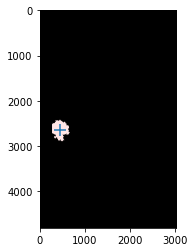

In [1]:
image = mpimg.imread(r'C:\Users\Asus\Desktop\PCD\Organized dataset\images\P_00001\left_CC_1\GT_mask.jpg')
threshold_value = filters.threshold_otsu(image)
labeled_foreground = (image > threshold_value).astype(int)
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid

print(center_of_mass)


colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
fig, ax = plt.subplots()
ax.imshow(colorized)
# Note the inverted coordinates because plt uses (x, y) while NumPy uses (row, column)
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
plt.show()

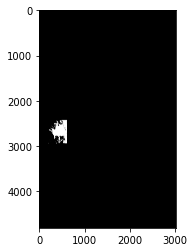

In [7]:
from Traitement_image.Restore_image import restore_mask
mask_path_gr = r"C:\Users\Asus\Desktop\PCD\Organized dataset\curated\P_00001\LEFT_CC\abnormality_0\GT_mask.jpg"
res = r"C:\Users\Asus\PycharmProjects\pythonProject1\temp\FCM_cluster_2_sample_0_inv.jpg"
im = restore_mask(mask_path_gr,res,(515, 431),(2640, 444))
plt.imshow(im,cmap="gray")

In [56]:
df =pd.read_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good.xlsx')
p_id = df['patient_id']
full_mammo_path = df['image full mammo path']
mask_path = df['ROI mask file path']
#cropped = df['cropped image file path']
a = list(df['patient_id'])
b = list(df['left or right breast'])
c = list(df['image view'])
e = list(df['abnormality id'])
print(mask_path)

0         P_00001\LEFT_CC\abnormality_0\GT_mask.jpg
1        P_00001\LEFT_MLO\abnormality_0\GT_mask.jpg
2         P_00004\LEFT_CC\abnormality_0\GT_mask.jpg
3        P_00004\LEFT_MLO\abnormality_0\GT_mask.jpg
4       P_00004\RIGHT_MLO\abnormality_0\GT_mask.jpg
                           ...                     
1691    P_02033\RIGHT_MLO\abnormality_0\GT_mask.jpg
1692     P_02079\RIGHT_CC\abnormality_0\GT_mask.jpg
1693    P_02079\RIGHT_MLO\abnormality_0\GT_mask.jpg
1694      P_02092\LEFT_CC\abnormality_0\GT_mask.jpg
1695     P_02092\LEFT_MLO\abnormality_0\GT_mask.jpg
Name: ROI mask file path, Length: 1696, dtype: object


In [ ]:
import os
center_of_ROIs =[]
for path in mask_path :
    abs_path = os.path.join(r'C:\Users\Asus\Desktop\PCD\Organized dataset\curated',path)
    image = mpimg.imread(abs_path)
    print(abs_path)
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    A = int(center_of_mass[0]),int(center_of_mass[1])
    print(A)
    center_of_ROIs.append(A)

In [75]:
df['center of roi'] = center_of_ROIs
df.to_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx', index = False)

## Region of interest shape

In [ ]:
df_old =pd.read_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata.xlsx')
cropped = df_old['cropped image file path']
list_shape_crop =[]
for path in cropped :
    abs_path = os.path.join(r'C:\Users\Asus\Desktop\PCD\Organized dataset\images',path)
    print(abs_path)
    image = mpimg.imread(abs_path)
    list_shape_crop.append(image.shape)
    print(image.shape)
    

In [77]:
df['Shape of cropped image'] = list_shape_crop
df.to_excel(r'C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx', index = False)

In [13]:
import numpy as np
from Traitement_image.Preprocessing_functions.Normalise import minmaxnormalise
x = cv2.imread(r"C:\Users\Asus\PycharmProjects\pythonProject1\image test algorithms\crop.jpg")
print(x)
# x = minmaxnormalise(x)
x = cv2.resize(x, (256, 256))
x = x / 255.0
print(x)

[[[ 48  48  48]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [176 176 176]
  [175 175 175]
  [179 179 179]]

 [[ 44  44  44]
  [ 39  39  39]
  [ 37  37  37]
  ...
  [171 171 171]
  [172 172 172]
  [175 175 175]]

 [[ 43  43  43]
  [ 41  41  41]
  [ 35  35  35]
  ...
  [164 164 164]
  [167 167 167]
  [169 169 169]]

 ...

 [[ 51  51  51]
  [ 55  55  55]
  [ 57  57  57]
  ...
  [172 172 172]
  [175 175 175]
  [174 174 174]]

 [[ 52  52  52]
  [ 54  54  54]
  [ 52  52  52]
  ...
  [167 167 167]
  [168 168 168]
  [166 166 166]]

 [[ 66  66  66]
  [ 66  66  66]
  [ 57  57  57]
  ...
  [165 165 165]
  [167 167 167]
  [166 166 166]]]
[[[0.17254902 0.17254902 0.17254902]
  [0.16078431 0.16078431 0.16078431]
  [0.15294118 0.15294118 0.15294118]
  ...
  [0.69019608 0.69019608 0.69019608]
  [0.67843137 0.67843137 0.67843137]
  [0.69019608 0.69019608 0.69019608]]

 [[0.16862745 0.16862745 0.16862745]
  [0.12941176 0.12941176 0.12941176]
  [0.10588235 0.10588235 0.10588235]
  ...
  [0.6745098  0.6745098